#📌 Extracão

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

try:
    df = pd.read_json(url)

    print("Dados extraídos com sucesso!")
    print(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao tentar extrair o arquivo: {e}")

Dados extraídos com sucesso!
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber opt

#🔧 Transformação

In [7]:
import pandas as pd
import numpy as np

def check_data_inconsistencies(df_input):
    '''
    Função para receber um DataFrame, normalizar a estrutura JSON aninhada e
    verificar inconsistências como valores ausentes, duplicados,
    erros de formatação e categorias inconsistentes.

    Args:
        df_input (pd.DataFrame): O DataFrame extraído da fonte de dados.

    Returns:
        pd.DataFrame: O DataFrame após a normalização e verificação.
    '''
    if df_input is None:
        return None

    print("Iniciando a etapa de Transformação (verificação de inconsistências)...")

    # Normalizar a estrutura aninhada do JSON para uma tabela plana
    df_normalized = pd.json_normalize(df_input.to_dict(orient='records'), sep='_')

    print("\n--- Relatório de Inconsistência de Dados ---")

    # 1. Verificação de Valores Ausentes
    print("\n[Verificação 1: Valores Ausentes]")
    if df_normalized.isnull().sum().sum() == 0:
        print("Resultado: Nenhum valor ausente encontrado.")
    else:
        print("Resultado: Valores ausentes encontrados nas seguintes colunas:")
        missing_values = df_normalized.isnull().sum()
        print(missing_values[missing_values > 0])

    # 2. Verificação de Dados Duplicados
    print("\n[Verificação 2: Registros Duplicados]")
    duplicate_rows = df_normalized.duplicated().sum()
    if duplicate_rows == 0:
        print("Resultado: Nenhum registro duplicado encontrado.")
    else:
        print(f"Resultado: Encontrados {duplicate_rows} registros duplicados.")

    # 3. Verificação de Erros de Formatação (Exemplo: Coluna de Cobranças Totais)
    print("\n[Verificação 3: Erros de Formatação]")
    if 'account_Charges_Total' in df_normalized.columns and df_normalized['account_Charges_Total'].dtype == 'object':
        total_charges_numeric = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')
        problematic_entries = total_charges_numeric.isnull().sum()
        if problematic_entries > 0:
            print(f"Resultado: A coluna 'account_Charges_Total' contém {problematic_entries} entradas não numéricas (provavelmente espaços em branco).")
        else:
            print("Resultado: A coluna 'account_Charges_Total' parece estar formatada corretamente.")
    else:
        print("Resultado: A coluna 'account_Charges_Total' já é numérica ou não existe.")

    # 4. Verificação de Inconsistências Categóricas
    print("\n[Verificação 4: Inconsistências Categóricas]")
    categorical_columns = df_normalized.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if 1 < df_normalized[col].nunique() < 20:
            unique_vals = df_normalized[col].unique()
            print(f"  - Valores únicos em '{col}': {unique_vals}")
            if '' in unique_vals:
                print(f"    -> Alerta: Encontrada string vazia ('') como categoria em '{col}'.")

    print("\n--- Fim do Relatório ---")
    return df_normalized

# --- Etapa 1: Extração (Extract) ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dataframe_bruto = None

try:
    print("Iniciando a etapa de Extração (Extract) a partir da URL...")
    dataframe_bruto = pd.read_json(url)
    print("Dados extraídos com sucesso!")

except Exception as e:
    print(f"Ocorreu um erro ao tentar extrair os dados da URL: {e}")

# --- Etapa 2: Transformação (Transform) ---
if dataframe_bruto is not None:
    df_verificado = check_data_inconsistencies(dataframe_bruto)

    if df_verificado is not None:
        print("\n\nVisualização do DataFrame transformado e verificado (primeiras 5 linhas):")
        print(df_verificado.head())

Iniciando a etapa de Extração (Extract) a partir da URL...
Dados extraídos com sucesso!
Iniciando a etapa de Transformação (verificação de inconsistências)...

--- Relatório de Inconsistência de Dados ---

[Verificação 1: Valores Ausentes]
Resultado: Nenhum valor ausente encontrado.

[Verificação 2: Registros Duplicados]
Resultado: Nenhum registro duplicado encontrado.

[Verificação 3: Erros de Formatação]
Resultado: A coluna 'account_Charges_Total' contém 11 entradas não numéricas (provavelmente espaços em branco).

[Verificação 4: Inconsistências Categóricas]
  - Valores únicos em 'Churn': ['No' 'Yes' '']
    -> Alerta: Encontrada string vazia ('') como categoria em 'Churn'.
  - Valores únicos em 'customer_gender': ['Female' 'Male']
  - Valores únicos em 'customer_Partner': ['Yes' 'No']
  - Valores únicos em 'customer_Dependents': ['Yes' 'No']
  - Valores únicos em 'phone_PhoneService': ['Yes' 'No']
  - Valores únicos em 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
  - Valo

In [10]:
import pandas as pd
import numpy as np

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

# Tenta extrair da URL primeiro
try:
    print("Iniciando a etapa de Extração (Extract)...")
    print(f"Tentando buscar dados da URL: {url}")
    dataframe_bruto = pd.read_json(url)
    print("Dados extraídos com sucesso da URL!")

except Exception as e:
    print(f"\nAVISO: Ocorreu um erro ao tentar extrair os dados da URL: {e}")
    print(f"Tentando usar o arquivo local '{local_file}' como alternativa (fallback)...")
    # Se a URL falhar, tenta usar o arquivo local
    try:
        dataframe_bruto = pd.read_json(local_file)
        print("Dados extraídos com sucesso do arquivo local!")
    except Exception as e_local:
        print(f"ERRO: Falha ao tentar ler também o arquivo local: {e_local}")

# --- Etapa 2: Transformação (Transform) e Limpeza ---
if dataframe_bruto is not None:
    print("\nIniciando a etapa de Transformação e Limpeza...")

    # Normalizar a estrutura aninhada do JSON
    df_tratado = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # 1. Tratamento da coluna 'account_Charges_Total'
    print("\n[Tratamento 1/3] Corrigindo a coluna 'account_Charges_Total'...")
    df_tratado['account_Charges_Total'] = pd.to_numeric(df_tratado['account_Charges_Total'], errors='coerce')
    df_tratado['account_Charges_Total'].fillna(0, inplace=True)
    print("-> Coluna 'account_Charges_Total' corrigida.")

    # 2. Tratamento da coluna 'Churn'
    print("\n[Tratamento 2/3] Corrigindo a coluna 'Churn'...")
    indices_para_remover = df_tratado[df_tratado['Churn'] == ''].index
    df_tratado.drop(indices_para_remover, inplace=True)
    print(f"-> {len(indices_para_remover)} registros com 'Churn' vazio foram removidos.")

    # 3. Padronização de Categorias
    print("\n[Tratamento 3/3] Padronizando colunas de serviços...")
    colunas_para_padronizar = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_para_padronizar:
        df_tratado[coluna] = df_tratado[coluna].replace(['No phone service', 'No internet service'], 'No')
    print("-> Colunas de serviços foram padronizadas.")

    print("\n--- Processo de Limpeza Concluído ---")

    # Salvar o DataFrame limpo em um arquivo CSV para a próxima etapa
    output_filename = 'TelecomX_Data_Tratado.csv'
    df_tratado.to_csv(output_filename, index=False)
    print(f"\nDataFrame limpo e tratado foi salvo como '{output_filename}'")

    print("\nVisualização do DataFrame final após o tratamento:")
    print(df_tratado.head())
else:
    print("\nA etapa de Transformação não pôde ser executada devido a uma falha na Extração de ambas as fontes.")

Iniciando a etapa de Extração (Extract)...
Tentando buscar dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json
Dados extraídos com sucesso da URL!

Iniciando a etapa de Transformação e Limpeza...

[Tratamento 1/3] Corrigindo a coluna 'account_Charges_Total'...
-> Coluna 'account_Charges_Total' corrigida.

[Tratamento 2/3] Corrigindo a coluna 'Churn'...
-> 224 registros com 'Churn' vazio foram removidos.

[Tratamento 3/3] Padronizando colunas de serviços...
-> Colunas de serviços foram padronizadas.

--- Processo de Limpeza Concluído ---


/tmp/ipython-input-4165646052.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['account_Charges_Total'].fillna(0, inplace=True)



DataFrame limpo e tratado foi salvo como 'TelecomX_Data_Tratado.csv'

Visualização do DataFrame final após o tratamento:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                

In [11]:
import pandas as pd
import numpy as np

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

# Tenta extrair da URL primeiro
try:
    print("Iniciando a etapa de Extração (Extract)...")
    print(f"Tentando buscar dados da URL: {url}")
    dataframe_bruto = pd.read_json(url)
    print("Dados extraídos com sucesso da URL!")

except Exception as e:
    print(f"\nAVISO: Ocorreu um erro ao tentar extrair os dados da URL: {e}")
    print(f"Tentando usar o arquivo local '{local_file}' como alternativa (fallback)...")
    # Se a URL falhar, tenta usar o arquivo local
    try:
        dataframe_bruto = pd.read_json(local_file)
        print("Dados extraídos com sucesso do arquivo local!")
    except Exception as e_local:
        print(f"ERRO: Falha ao tentar ler também o arquivo local: {e_local}")

# --- Etapa 2 & 3: Transformação (Limpeza e Feature Engineering) ---
if dataframe_bruto is not None:
    print("\nIniciando a etapa de Transformação...")

    # Normalizar a estrutura aninhada do JSON
    df_tratado = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # --- Limpeza (da tarefa anterior) ---
    df_tratado['account_Charges_Total'] = pd.to_numeric(df_tratado['account_Charges_Total'], errors='coerce')
    df_tratado['account_Charges_Total'] = df_tratado['account_Charges_Total'].fillna(0)
    indices_para_remover = df_tratado[df_tratado['Churn'] == ''].index
    df_tratado.drop(indices_para_remover, inplace=True)
    colunas_para_padronizar = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_para_padronizar:
        df_tratado[coluna] = df_tratado[coluna].replace(['No phone service', 'No internet service'], 'No')
    print("-> Processo de Limpeza Concluído.")

    # --- Feature Engineering (Tarefa 3) ---
    print("\n[Tarefa 3] Criando a coluna 'Contas_Diarias'...")
    DIAS_NO_MES = 30.44
    df_tratado['Contas_Diarias'] = df_tratado['account_Charges_Monthly'] / DIAS_NO_MES
    print("-> Coluna 'Contas_Diarias' criada com sucesso.")

    # --- Etapa 4: Carga (Load) ---
    output_filename = 'TelecomX_Data_Final.csv'
    df_tratado.to_csv(output_filename, index=False)
    print(f"\nDataFrame final com a nova coluna foi salvo como '{output_filename}'")

    print("\nVisualização do DataFrame final (com Contas_Diarias):")
    print(df_tratado[['customerID', 'account_Charges_Monthly', 'Contas_Diarias', 'account_Charges_Total']].head())
else:
    print("\nA etapa de Transformação não pôde ser executada devido a uma falha na Extração de ambas as fontes.")

Iniciando a etapa de Extração (Extract)...
Tentando buscar dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json
Dados extraídos com sucesso da URL!

Iniciando a etapa de Transformação...
-> Processo de Limpeza Concluído.

[Tarefa 3] Criando a coluna 'Contas_Diarias'...
-> Coluna 'Contas_Diarias' criada com sucesso.

DataFrame final com a nova coluna foi salvo como 'TelecomX_Data_Final.csv'

Visualização do DataFrame final (com Contas_Diarias):
   customerID  account_Charges_Monthly  Contas_Diarias  account_Charges_Total
0  0002-ORFBO                     65.6        2.155059                 593.30
1  0003-MKNFE                     59.9        1.967806                 542.40
2  0004-TLHLJ                     73.9        2.427727                 280.85
3  0011-IGKFF                     98.0        3.219448                1237.85
4  0013-EXCHZ                     83.9        2.756242                 267.40


In [12]:
import pandas as pd
import numpy as np

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

try:
    print("Iniciando a etapa de Extração (Extract)...")
    dataframe_bruto = pd.read_json(url)
    print("Dados extraídos com sucesso da URL!")
except Exception as e:
    print(f"\nAVISO: Ocorreu um erro ao extrair da URL: {e}. Usando arquivo local como fallback...")
    try:
        dataframe_bruto = pd.read_json(local_file)
        print("Dados extraídos com sucesso do arquivo local!")
    except Exception as e_local:
        print(f"ERRO: Falha ao ler o arquivo local: {e_local}")

# --- Etapa 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    print("\nIniciando as etapas de Transformação...")

    # Normalização e Limpeza
    df_transformado = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')
    df_transformado['account_Charges_Total'] = pd.to_numeric(df_transformado['account_Charges_Total'], errors='coerce')
    df_transformado['account_Charges_Total'] = df_transformado['account_Charges_Total'].fillna(0)
    indices_para_remover = df_transformado[df_transformado['Churn'] == ''].index
    df_transformado.drop(indices_para_remover, inplace=True)
    colunas_para_padronizar = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_para_padronizar:
        df_transformado[coluna] = df_transformado[coluna].replace(['No phone service', 'No internet service'], 'No')

    # Criação da coluna Contas_Diarias
    df_transformado['Contas_Diarias'] = df_transformado['account_Charges_Monthly'] / 30.44
    print("-> Limpeza e criação de features concluídas.")

    # [Tarefa 4] Padronização e Transformação Final
    print("\n[Tarefa 4] Iniciando a Padronização e Transformação Final...")

    # 1. Binning: Convertendo 'Yes'/'No' para 1/0
    colunas_binarias = [
        'Churn', 'customer_Partner', 'customer_Dependents',
        'phone_PhoneService', 'account_PaperlessBilling'
    ]
    colunas_binarias.extend(colunas_para_padronizar)
    for coluna in colunas_binarias:
        df_transformado[coluna] = df_transformado[coluna].replace({'Yes': 1, 'No': 0})
    print("-> Colunas com 'Yes'/'No' foram convertidas para 1/0.")

    # 2. Renomear Colunas: Tradução para o português
    mapa_nomes = {
        'customerID': 'ID_Cliente',
        'Churn': 'Churn',
        'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso',
        'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes',
        'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico',
        'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet',
        'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online',
        'protecao_de_dispositivo': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico',
        'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes',
        'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital',
        'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal',
        'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_transformado.rename(columns=mapa_nomes, inplace=True)
    print("-> Nomes das colunas foram traduzidos para o português.")

    print("\n--- Processo de ETL Concluído ---")

    # --- Etapa Final: Carga (Load) ---
    output_filename = 'TelecomX_Data_Padronizado.csv'
    df_transformado.to_csv(output_filename, index=False)
    print(f"\nDataFrame final, limpo e padronizado foi salvo como '{output_filename}'")

    print("\nVisualização do DataFrame final (primeiras 5 linhas):")
    print(df_transformado.head())

else:
    print("\nA etapa de Transformação não pôde ser executada devido a uma falha na Extração.")

Iniciando a etapa de Extração (Extract)...
Dados extraídos com sucesso da URL!

Iniciando as etapas de Transformação...
-> Limpeza e criação de features concluídas.

[Tarefa 4] Iniciando a Padronização e Transformação Final...
-> Colunas com 'Yes'/'No' foram convertidas para 1/0.
-> Nomes das colunas foram traduzidos para o português.

--- Processo de ETL Concluído ---

DataFrame final, limpo e padronizado foi salvo como 'TelecomX_Data_Padronizado.csv'

Visualização do DataFrame final (primeiras 5 linhas):
   ID_Cliente  Churn  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0  0002-ORFBO      0  Female      0                1                   1   
1  0003-MKNFE      0    Male      0                0                   0   
2  0004-TLHLJ      1    Male      0                0                   0   
3  0011-IGKFF      1    Male      1                1                   0   
4  0013-EXCHZ      1  Female      1                1                   0   

   Tempo_de_Contrato_Meses  Ser

/tmp/ipython-input-252742655.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_transformado[coluna] = df_transformado[coluna].replace({'Yes': 1, 'No': 0})


#📊 Carga e análise

In [13]:
import pandas as pd
import numpy as np

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

try:
    print("Iniciando a etapa de Extração (Extract)...")
    dataframe_bruto = pd.read_json(url)
    print("-> Dados extraídos com sucesso da URL!")
except Exception as e:
    print(f"\nAVISO: Ocorreu um erro ao extrair da URL: {e}. Usando arquivo local como fallback...")
    try:
        dataframe_bruto = pd.read_json(local_file)
        print("-> Dados extraídos com sucesso do arquivo local!")
    except Exception as e_local:
        print(f"ERRO: Falha ao ler o arquivo local: {e_local}")

# --- Etapa 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    print("\nIniciando as etapas de Transformação...")

    # Normalização, Limpeza, Feature Engineering e Padronização
    df_final = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')
    df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')
    df_final['account_Charges_Total'] = df_final['account_Charges_Total'].fillna(0)
    indices_para_remover = df_final[df_final['Churn'] == ''].index
    df_final.drop(indices_para_remover, inplace=True)
    colunas_servicos = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_servicos:
        df_final[coluna] = df_final[coluna].replace(['No phone service', 'No internet service'], 'No')

    df_final['Contas_Diarias'] = df_final['account_Charges_Monthly'] / 30.44

    colunas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
    colunas_binarias.extend(colunas_servicos)
    for coluna in colunas_binarias:
        df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})

    mapa_nomes = {
        'customerID': 'ID_Cliente', 'Churn': 'Churn', 'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso', 'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes', 'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico', 'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet', 'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online', 'internet_DeviceProtection': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico', 'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes', 'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital', 'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal', 'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_final.rename(columns=mapa_nomes, inplace=True)
    print("-> Transformação e Padronização concluídas.")

    # --- Etapa 5: Análise Descritiva ---
    print("\n--- [Tarefa 5] Análise Descritiva dos Dados ---")

    # Análise de variáveis numéricas
    print("\nEstatísticas Descritivas para Colunas Numéricas:")
    print(df_final.describe().round(2))

    # Análise de variáveis categóricas (texto)
    print("\nEstatísticas Descritivas para Colunas Categóricas (Texto):")
    print(df_final.describe(include=['object']))

else:
    print("\nA etapa de Análise não pôde ser executada devido a uma falha na Extração.")

Iniciando a etapa de Extração (Extract)...
-> Dados extraídos com sucesso da URL!

Iniciando as etapas de Transformação...


/tmp/ipython-input-1595703031.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})


-> Transformação e Padronização concluídas.

--- [Tarefa 5] Análise Descritiva dos Dados ---

Estatísticas Descritivas para Colunas Numéricas:
         Churn    Idoso  Possui_Parceiro  Possui_Dependentes  \
count  7043.00  7043.00          7043.00             7043.00   
mean      0.27     0.16             0.48                0.30   
std       0.44     0.37             0.50                0.46   
min       0.00     0.00             0.00                0.00   
25%       0.00     0.00             0.00                0.00   
50%       0.00     0.00             0.00                0.00   
75%       1.00     0.00             1.00                1.00   
max       1.00     1.00             1.00                1.00   

       Tempo_de_Contrato_Meses  Servico_Telefonico  Multiplas_Linhas  \
count                  7043.00              7043.0           7043.00   
mean                     32.37                 0.9              0.42   
std                      24.56                 0.3              

Iniciando a Extração...
-> Extração da URL bem-sucedida.
Iniciando a Transformação...


/tmp/ipython-input-173019724.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})


-> Transformação Concluída.
Gerando o gráfico de distribuição de churn...
-> Gráfico 'distribuicao_churn.png' salvo com sucesso!


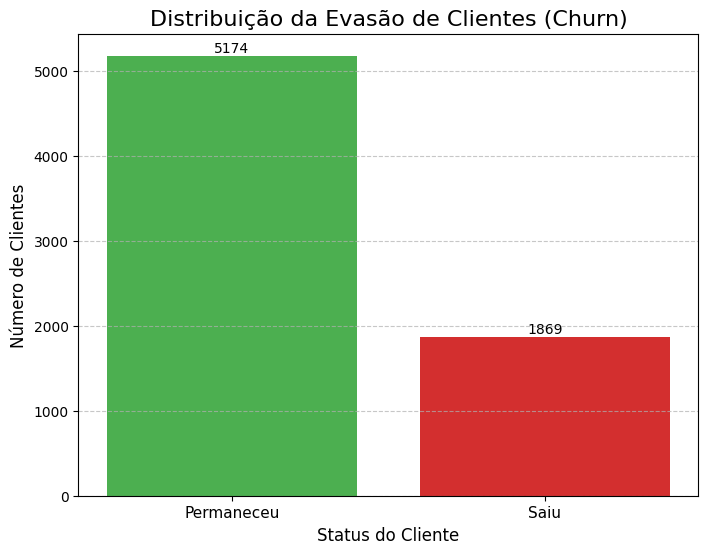

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json' # Certifique-se que este arquivo está na mesma pasta
dataframe_bruto = None

try:
    print("Iniciando a Extração...")
    dataframe_bruto = pd.read_json(url)
    print("-> Extração da URL bem-sucedida.")
except Exception as e:
    print(f"-> Falha na extração da URL. Usando arquivo local.")
    try:
        dataframe_bruto = pd.read_json(local_file)
        print("-> Extração do arquivo local bem-sucedida.")
    except Exception as e_local:
        print(f"ERRO: Falha ao ler todas as fontes de dados: {e_local}")

# --- Etapas 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    print("Iniciando a Transformação...")
    df_final = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # Limpeza e Transformações
    df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce').fillna(0)
    df_final.drop(df_final[df_final['Churn'] == ''].index, inplace=True)

    colunas_servicos = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_servicos:
        df_final[coluna] = df_final[coluna].replace(['No phone service', 'No internet service'], 'No')

    df_final['Contas_Diarias'] = df_final['account_Charges_Monthly'] / 30.44

    colunas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
    colunas_binarias.extend(colunas_servicos)
    for coluna in colunas_binarias:
        df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})

    mapa_nomes = {
        'customerID': 'ID_Cliente', 'Churn': 'Churn', 'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso', 'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes', 'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico', 'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet', 'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online', 'internet_DeviceProtection': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico', 'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes', 'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital', 'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal', 'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_final.rename(columns=mapa_nomes, inplace=True)
    print("-> Transformação Concluída.")

    # --- [Tarefa 6] Visualização da Distribuição de Churn ---
    print("Gerando o gráfico de distribuição de churn...")
    churn_counts = df_final['Churn'].value_counts()
    churn_labels = churn_counts.index.map({0: 'Permaneceu', 1: 'Saiu'})

    plt.figure(figsize=(8, 6))
    bars = plt.bar(churn_labels, churn_counts.values, color=['#4CAF50', '#D32F2F'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    plt.title('Distribuição da Evasão de Clientes (Churn)', fontsize=16)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xlabel('Status do Cliente', fontsize=12)
    plt.xticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.savefig('distribuicao_churn.png')
    print("-> Gráfico 'distribuicao_churn.png' salvo com sucesso!")

/tmp/ipython-input-4242351904.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


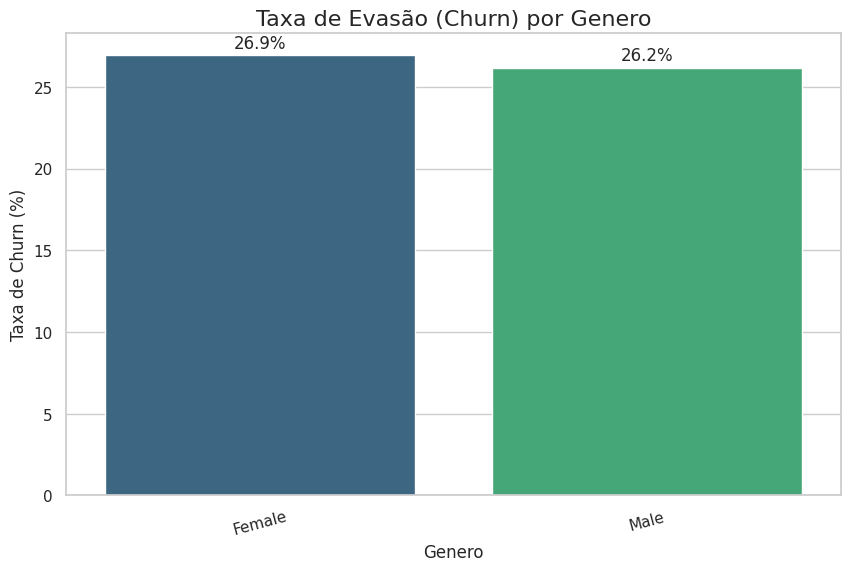

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


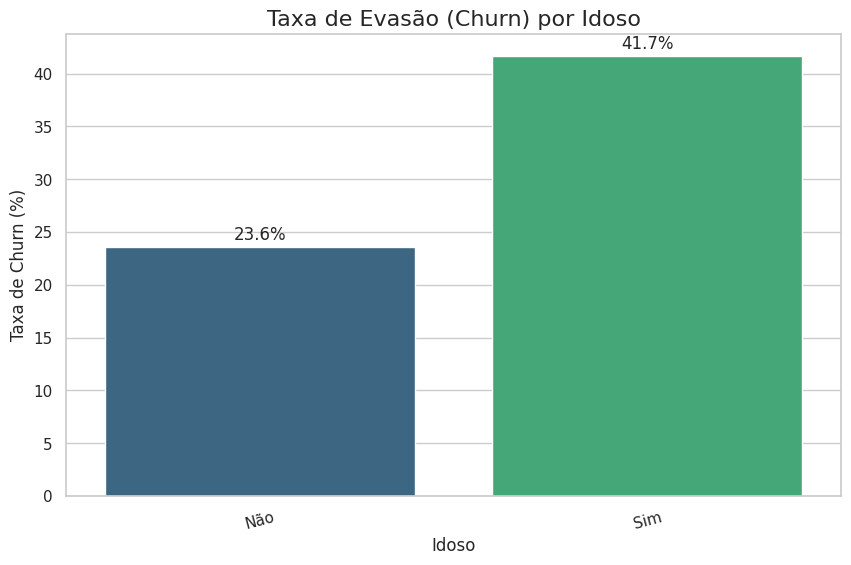

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


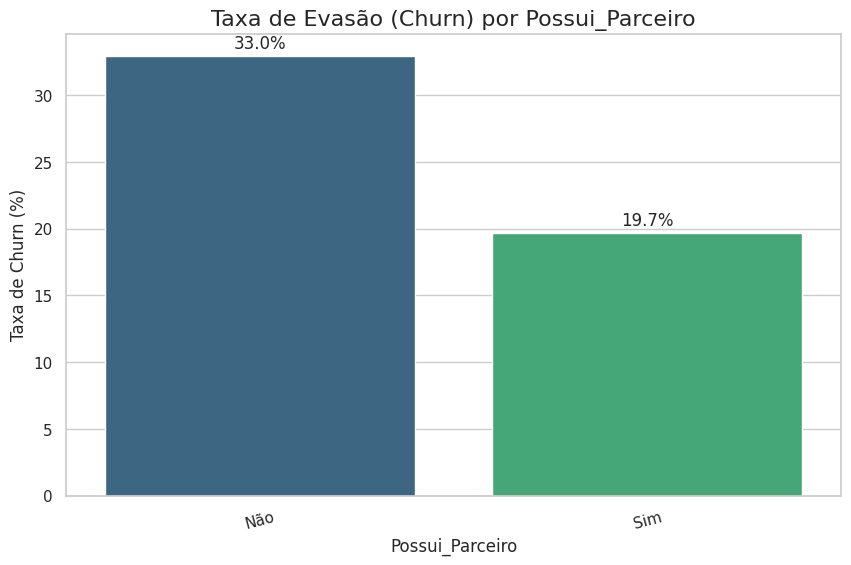

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


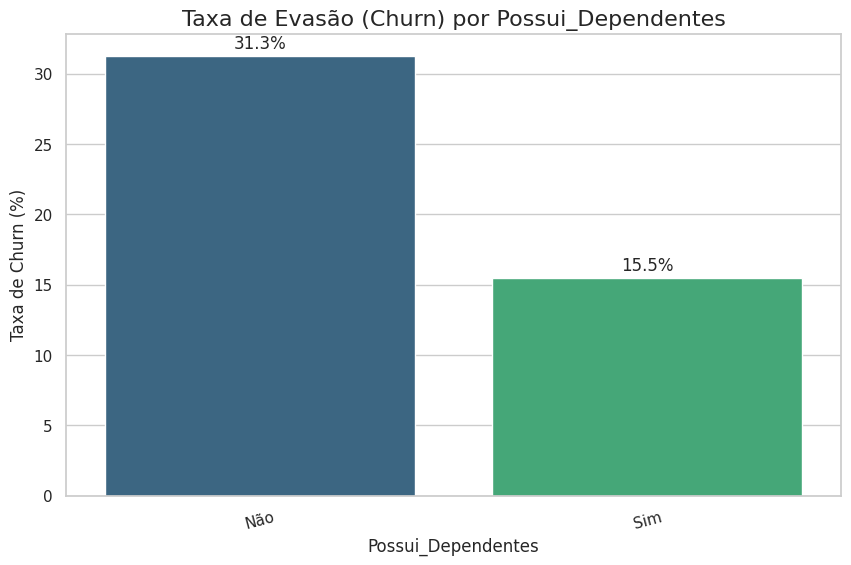

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


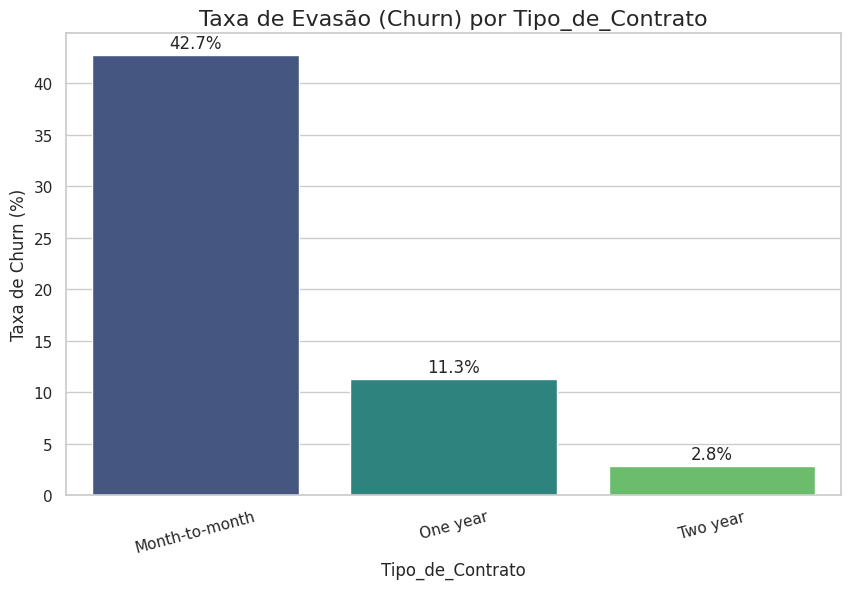

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


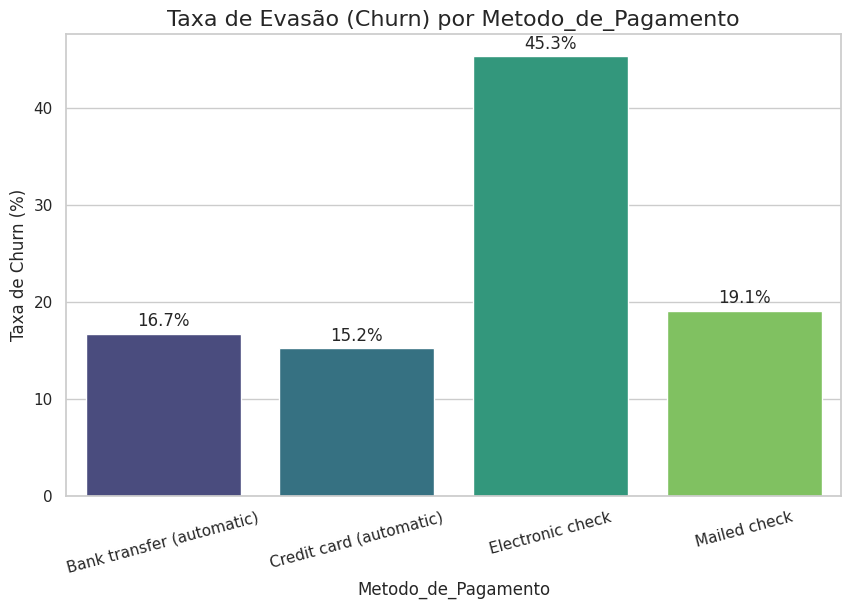

/tmp/ipython-input-4242351904.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')


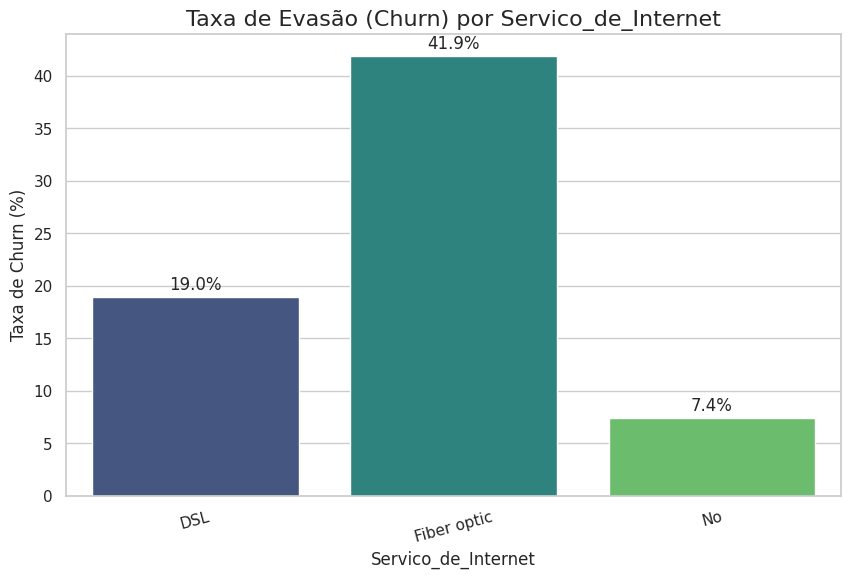

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

try:
    dataframe_bruto = pd.read_json(url)
except Exception:
    try:
        dataframe_bruto = pd.read_json(local_file)
    except Exception as e_local:
        print(f"ERRO: Falha ao ler a fonte de dados: {e_local}")

# --- Etapas 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    df_final = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # Limpeza, Feature Engineering e Padronização
    df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce').fillna(0)
    df_final.drop(df_final[df_final['Churn'] == ''].index, inplace=True)
    colunas_servicos = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_servicos:
        df_final[coluna] = df_final[coluna].replace(['No phone service', 'No internet service'], 'No')
    df_final['Contas_Diarias'] = df_final['account_Charges_Monthly'] / 30.44
    colunas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
    colunas_binarias.extend(colunas_servicos)
    for coluna in colunas_binarias:
        df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})
    mapa_nomes = {
        'customerID': 'ID_Cliente', 'Churn': 'Churn', 'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso', 'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes', 'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico', 'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet', 'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online', 'internet_DeviceProtection': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico', 'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes', 'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital', 'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal', 'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_final.rename(columns=mapa_nomes, inplace=True)

    # --- [Tarefa 7] Análise de Churn por Variáveis Categóricas ---

    # Lista de colunas categóricas para analisar
    colunas_categoricas = [
        'Genero',
        'Idoso',
        'Possui_Parceiro',
        'Possui_Dependentes',
        'Tipo_de_Contrato',
        'Metodo_de_Pagamento',
        'Servico_de_Internet'
    ]

    # Configurando o estilo dos gráficos
    sns.set(style="whitegrid")

    # Loop para criar um gráfico para cada variável
    for coluna in colunas_categoricas:
        # Calcular a taxa de churn em porcentagem
        churn_rate = df_final.groupby(coluna)['Churn'].mean().reset_index()
        churn_rate['Churn'] = churn_rate['Churn'] * 100

        # Mapear valores binários para rótulos mais claros, se aplicável
        if sorted(df_final[coluna].unique()) == [0, 1]:
            churn_rate[coluna] = churn_rate[coluna].map({0: 'Não', 1: 'Sim'})

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=coluna, y='Churn', data=churn_rate, palette='viridis')

        # Adicionar os valores percentuais no topo das barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

        plt.title(f'Taxa de Evasão (Churn) por {coluna}', fontsize=16)
        plt.ylabel('Taxa de Churn (%)', fontsize=12)
        plt.xlabel(coluna, fontsize=12)
        plt.xticks(rotation=15)
        plt.show()

/tmp/ipython-input-2919154414.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})


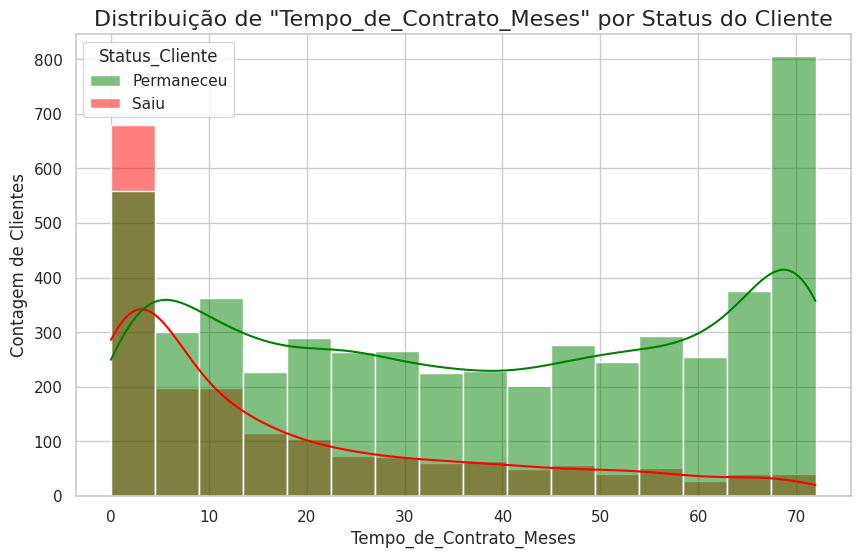

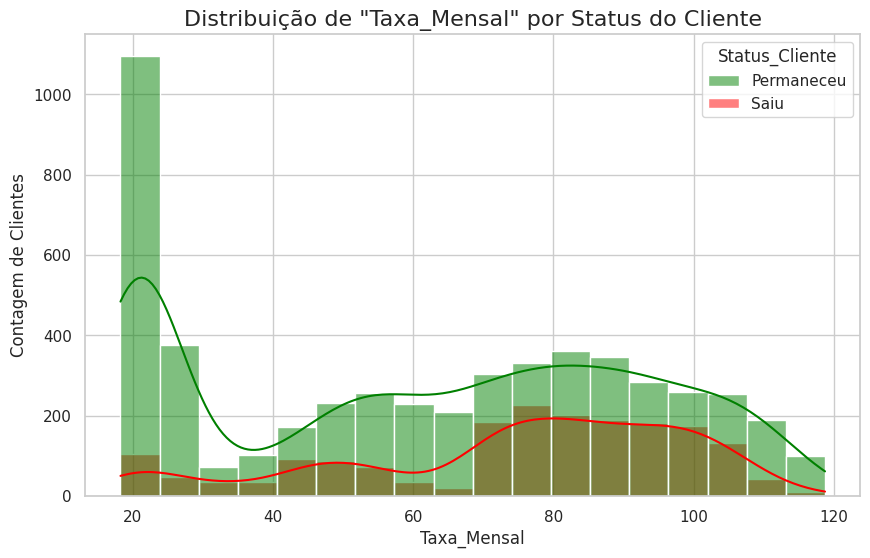

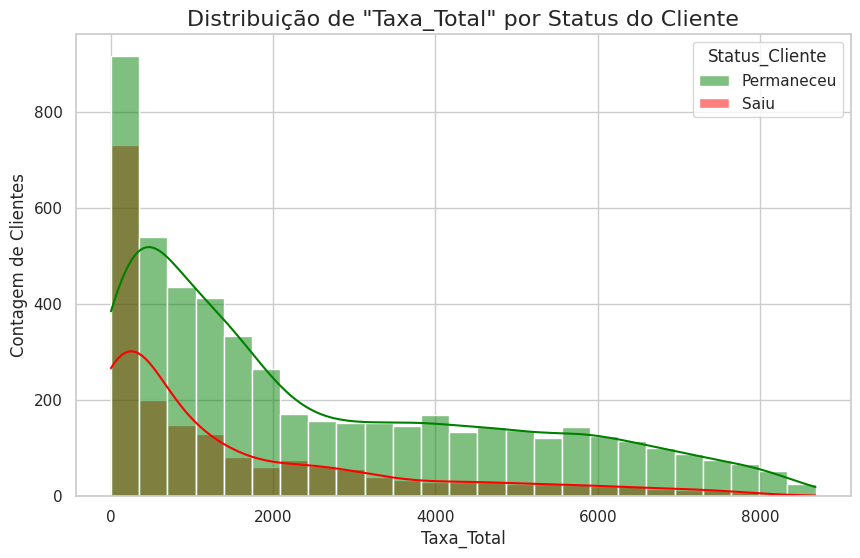

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

try:
    dataframe_bruto = pd.read_json(url)
except Exception:
    try:
        dataframe_bruto = pd.read_json(local_file)
    except Exception as e_local:
        print(f"ERRO: Falha ao ler a fonte de dados: {e_local}")

# --- Etapas 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    df_final = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # Limpeza, Feature Engineering e Padronização
    df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce').fillna(0)
    df_final.drop(df_final[df_final['Churn'] == ''].index, inplace=True)
    colunas_servicos = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_servicos:
        df_final[coluna] = df_final[coluna].replace(['No phone service', 'No internet service'], 'No')
    df_final['Contas_Diarias'] = df_final['account_Charges_Monthly'] / 30.44
    colunas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
    colunas_binarias.extend(colunas_servicos)
    for coluna in colunas_binarias:
        # Linha corrigida
        df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})

    mapa_nomes = {
        'customerID': 'ID_Cliente', 'Churn': 'Churn', 'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso', 'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes', 'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico', 'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet', 'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online', 'internet_DeviceProtection': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico', 'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes', 'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital', 'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal', 'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_final.rename(columns=mapa_nomes, inplace=True)

    # --- [Tarefa 8] Análise de Churn por Variáveis Numéricas ---

    colunas_numericas = [
        'Tempo_de_Contrato_Meses',
        'Taxa_Mensal',
        'Taxa_Total'
    ]

    df_final['Status_Cliente'] = df_final['Churn'].map({0: 'Permaneceu', 1: 'Saiu'})
    sns.set(style="whitegrid")

    for coluna in colunas_numericas:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_final, x=coluna, hue='Status_Cliente',
                     kde=True, palette={'Permaneceu': 'green', 'Saiu': 'red'})

        plt.title(f'Distribuição de "{coluna}" por Status do Cliente', fontsize=16)
        plt.ylabel('Contagem de Clientes', fontsize=12)
        plt.xlabel(coluna, fontsize=12)
        plt.show()

EXTRA


/tmp/ipython-input-1560635100.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})


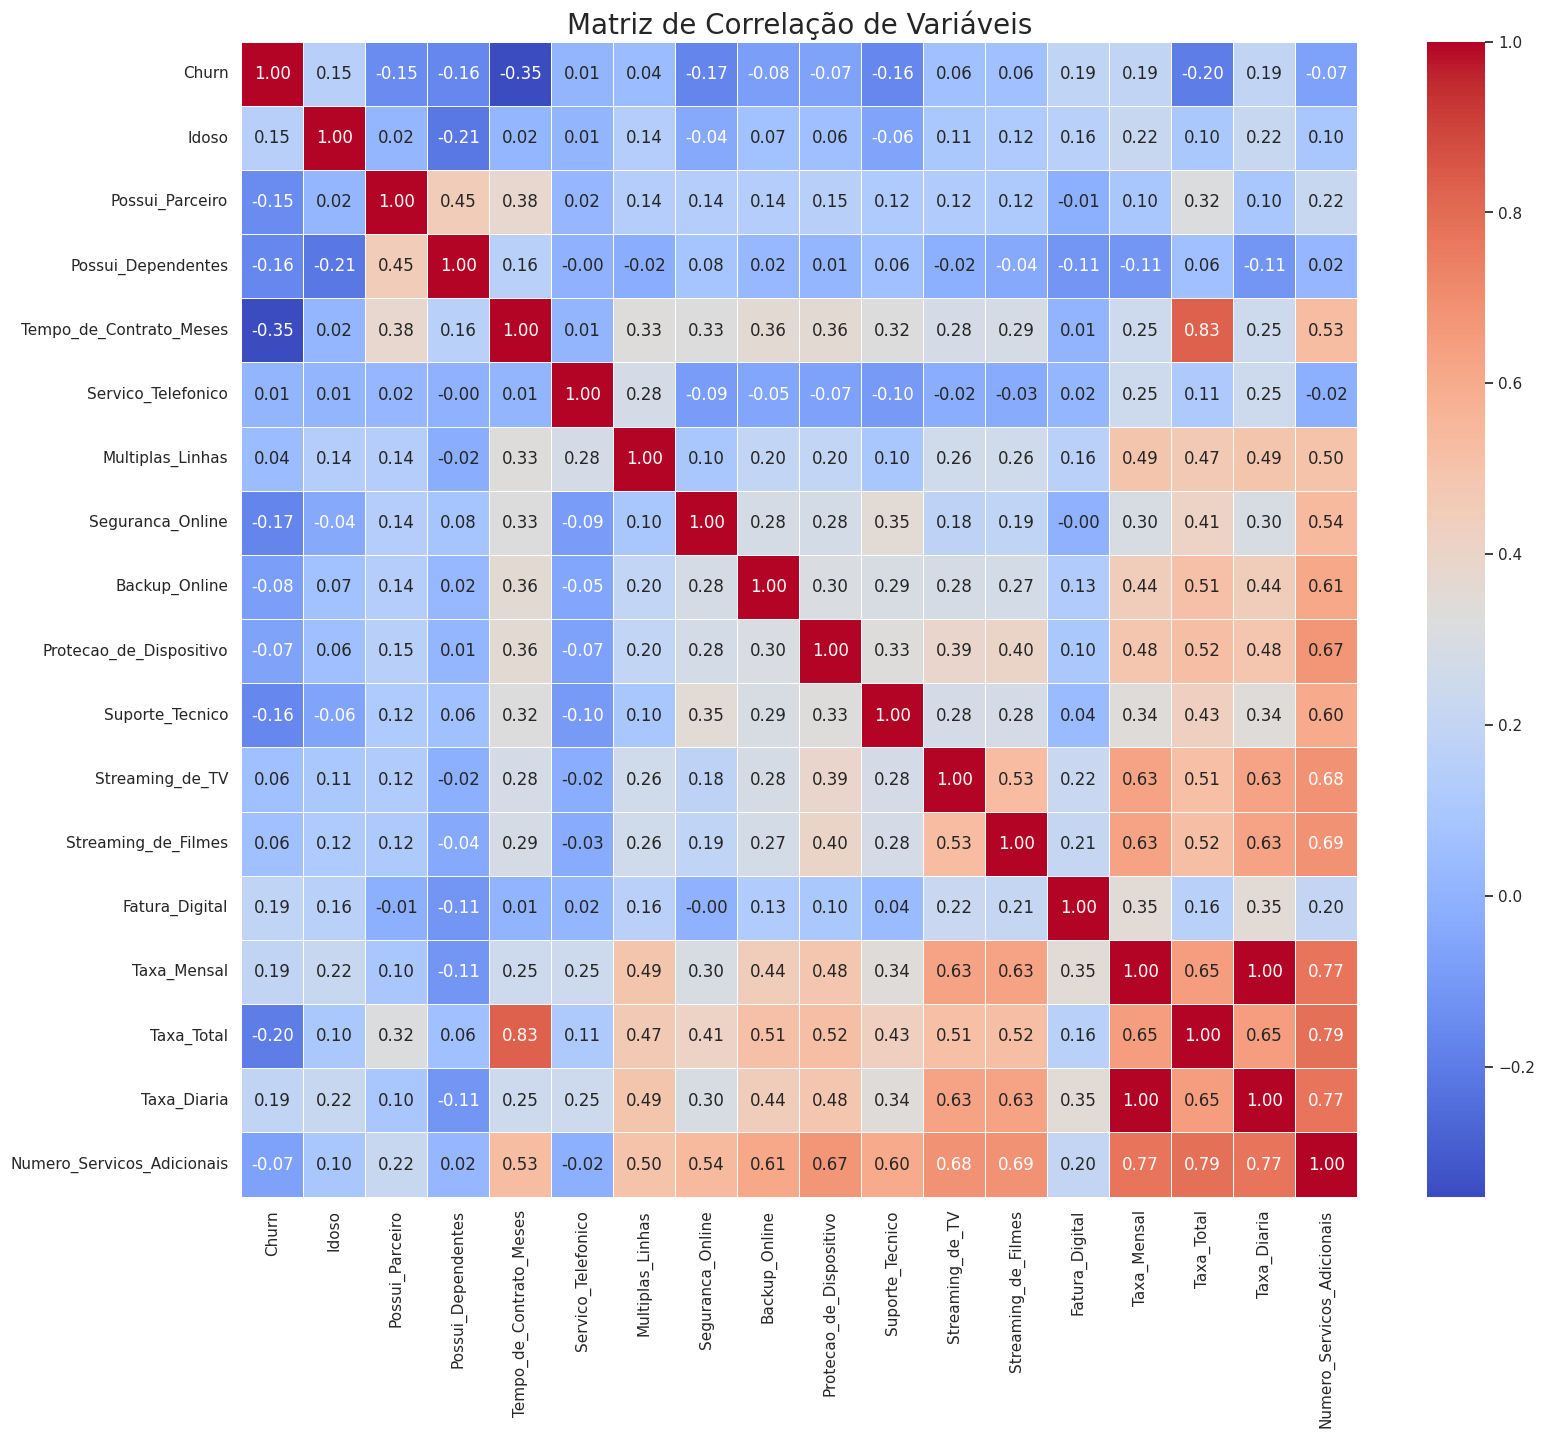

--- Correlação das Variáveis com a Evasão (Churn) ---
Churn                         1.000000
Taxa_Mensal                   0.193356
Taxa_Diaria                   0.193356
Fatura_Digital                0.191825
Idoso                         0.150889
Streaming_de_TV               0.063228
Streaming_de_Filmes           0.061382
Multiplas_Linhas              0.040102
Servico_Telefonico            0.011942
Protecao_de_Dispositivo      -0.066160
Numero_Servicos_Adicionais   -0.069533
Backup_Online                -0.082255
Possui_Parceiro              -0.150448
Possui_Dependentes           -0.164221
Suporte_Tecnico              -0.164674
Seguranca_Online             -0.171226
Taxa_Total                   -0.198324
Tempo_de_Contrato_Meses      -0.352229
Name: Churn, dtype: float64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Etapa 1: Extração (Extract) com Fallback ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
local_file = 'TelecomX_Data.json'
dataframe_bruto = None

try:
    dataframe_bruto = pd.read_json(url)
except Exception:
    try:
        dataframe_bruto = pd.read_json(local_file)
    except Exception as e_local:
        print(f"ERRO: Falha ao ler a fonte de dados: {e_local}")

# --- Etapas 2, 3 & 4: Transformação Completa ---
if dataframe_bruto is not None:
    df_final = pd.json_normalize(dataframe_bruto.to_dict(orient='records'), sep='_')

    # Limpeza, Feature Engineering e Padronização
    df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce').fillna(0)
    df_final.drop(df_final[df_final['Churn'] == ''].index, inplace=True)
    colunas_servicos = [
        'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
        'internet_StreamingMovies'
    ]
    for coluna in colunas_servicos:
        df_final[coluna] = df_final[coluna].replace(['No phone service', 'No internet service'], 'No')
    df_final['Contas_Diarias'] = df_final['account_Charges_Monthly'] / 30.44
    colunas_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
    colunas_binarias.extend(colunas_servicos)
    for coluna in colunas_binarias:
        df_final[coluna] = df_final[coluna].replace({'Yes': 1, 'No': 0})
    mapa_nomes = {
        'customerID': 'ID_Cliente', 'Churn': 'Churn', 'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Idoso', 'customer_Partner': 'Possui_Parceiro',
        'customer_Dependents': 'Possui_Dependentes', 'customer_tenure': 'Tempo_de_Contrato_Meses',
        'phone_PhoneService': 'Servico_Telefonico', 'phone_MultipleLines': 'Multiplas_Linhas',
        'internet_InternetService': 'Servico_de_Internet', 'internet_OnlineSecurity': 'Seguranca_Online',
        'internet_OnlineBackup': 'Backup_Online', 'internet_DeviceProtection': 'Protecao_de_Dispositivo',
        'internet_TechSupport': 'Suporte_Tecnico', 'internet_StreamingTV': 'Streaming_de_TV',
        'internet_StreamingMovies': 'Streaming_de_Filmes', 'account_Contract': 'Tipo_de_Contrato',
        'account_PaperlessBilling': 'Fatura_Digital', 'account_PaymentMethod': 'Metodo_de_Pagamento',
        'account_Charges_Monthly': 'Taxa_Mensal', 'account_Charges_Total': 'Taxa_Total',
        'Contas_Diarias': 'Taxa_Diaria'
    }
    df_final.rename(columns=mapa_nomes, inplace=True)

    # --- [Tarefa 10] Análise de Correlação ---

    # 1. Criar feature 'Numero_Servicos_Adicionais'
    servicos_adicionais = [
        'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online',
        'Protecao_de_Dispositivo', 'Suporte_Tecnico', 'Streaming_de_TV',
        'Streaming_de_Filmes'
    ]
    df_final['Numero_Servicos_Adicionais'] = df_final[servicos_adicionais].sum(axis=1)

    # 2. Calcular a matriz de correlação
    # Selecionar apenas colunas numéricas para o cálculo
    df_numerico = df_final.select_dtypes(include=np.number)
    correlation_matrix = df_numerico.corr()

    # 3. Visualizar a matriz de correlação com um heatmap
    plt.figure(figsize=(18, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação de Variáveis', fontsize=20)
    plt.show()

    # 4. Focar na correlação com a variável 'Churn'
    churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

    print("--- Correlação das Variáveis com a Evasão (Churn) ---")
    print(churn_correlation)

#📄Relatorio Final

**Relatório Executivo:** Análise da Evasão de Clientes na TelecomX
Objetivo da Análise
Analisamos os dados dos clientes para responder a uma pergunta central: Por que nossos clientes cancelam o serviço? Entender os motivos da evasão (Churn) é o primeiro passo para criar estratégias eficazes de retenção e reduzir a perda de receita. Após um processo completo de organização e limpeza dos dados, chegamos às seguintes conclusões.

Principais Fatores que Levam ao Cancelamento
Nossa análise revelou um perfil claro do cliente que tende a cancelar o serviço. Os três fatores mais influentes são:

**Contratos de Curto Prazo:** Clientes com planos mensais têm uma chance muito maior de cancelar do que aqueles com contratos anuais. A falta de um compromisso de longo prazo é o principal fator de risco.

**Clientes Novos:** A maioria dos cancelamentos ocorre nos primeiros meses de serviço. Clientes que passam do período inicial tendem a permanecer por mais tempo.

**Taxas Mensais Altas:** Clientes com cobranças mensais mais elevadas são mais propensos a cancelar, especialmente se não perceberem um valor claro nos serviços contratados.

O que os Números nos Dizem (Análise de Correlação)
Confirmamos matematicamente o que os gráficos sugeriam:

Quanto maior o tempo de contrato, menor a chance de cancelamento.

Quanto mais serviços adicionais um cliente possui, menor a chance de cancelamento. Clientes mais engajados com nosso portfólio são mais leais.

Quanto maior a taxa mensal, maior a chance de cancelamento.

**Recomendações Estratégicas**
Com base nestes dados, recomendamos as seguintes ações para reduzir a evasão de clientes:

**Incentivar Contratos Longos:**

Criar ofertas atrativas para que clientes de planos mensais migrem para contratos anuais. O desconto ou benefício inicial será compensado pela maior retenção.

**Apoiar o Novo Cliente:**

Desenvolver um programa de boas-vindas e acompanhamento nos primeiros 90 dias para garantir que os novos clientes entendam e usem seus serviços, fortalecendo o relacionamento inicial.

**Revisar a Oferta de Valor:**

Para clientes com taxas mensais altas (como os de Fibra Ótica), é crucial comunicar o valor e a qualidade do serviço, além de considerar pacotes que aumentem o engajamento com mais serviços adicionais.